In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

dataset = load_breast_cancer()
X, Y = dataset.data, dataset.target
df = pd.DataFrame(X, columns=dataset.feature_names)
df['target'] = Y
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [2]:
print(df.isna().sum())
if df.isna().sum().any():
    print("Dataset contains missing values.")
else:
    print("No missing values in the dataset.")

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64
No missing values in the dataset.



Plotting Histograms ...


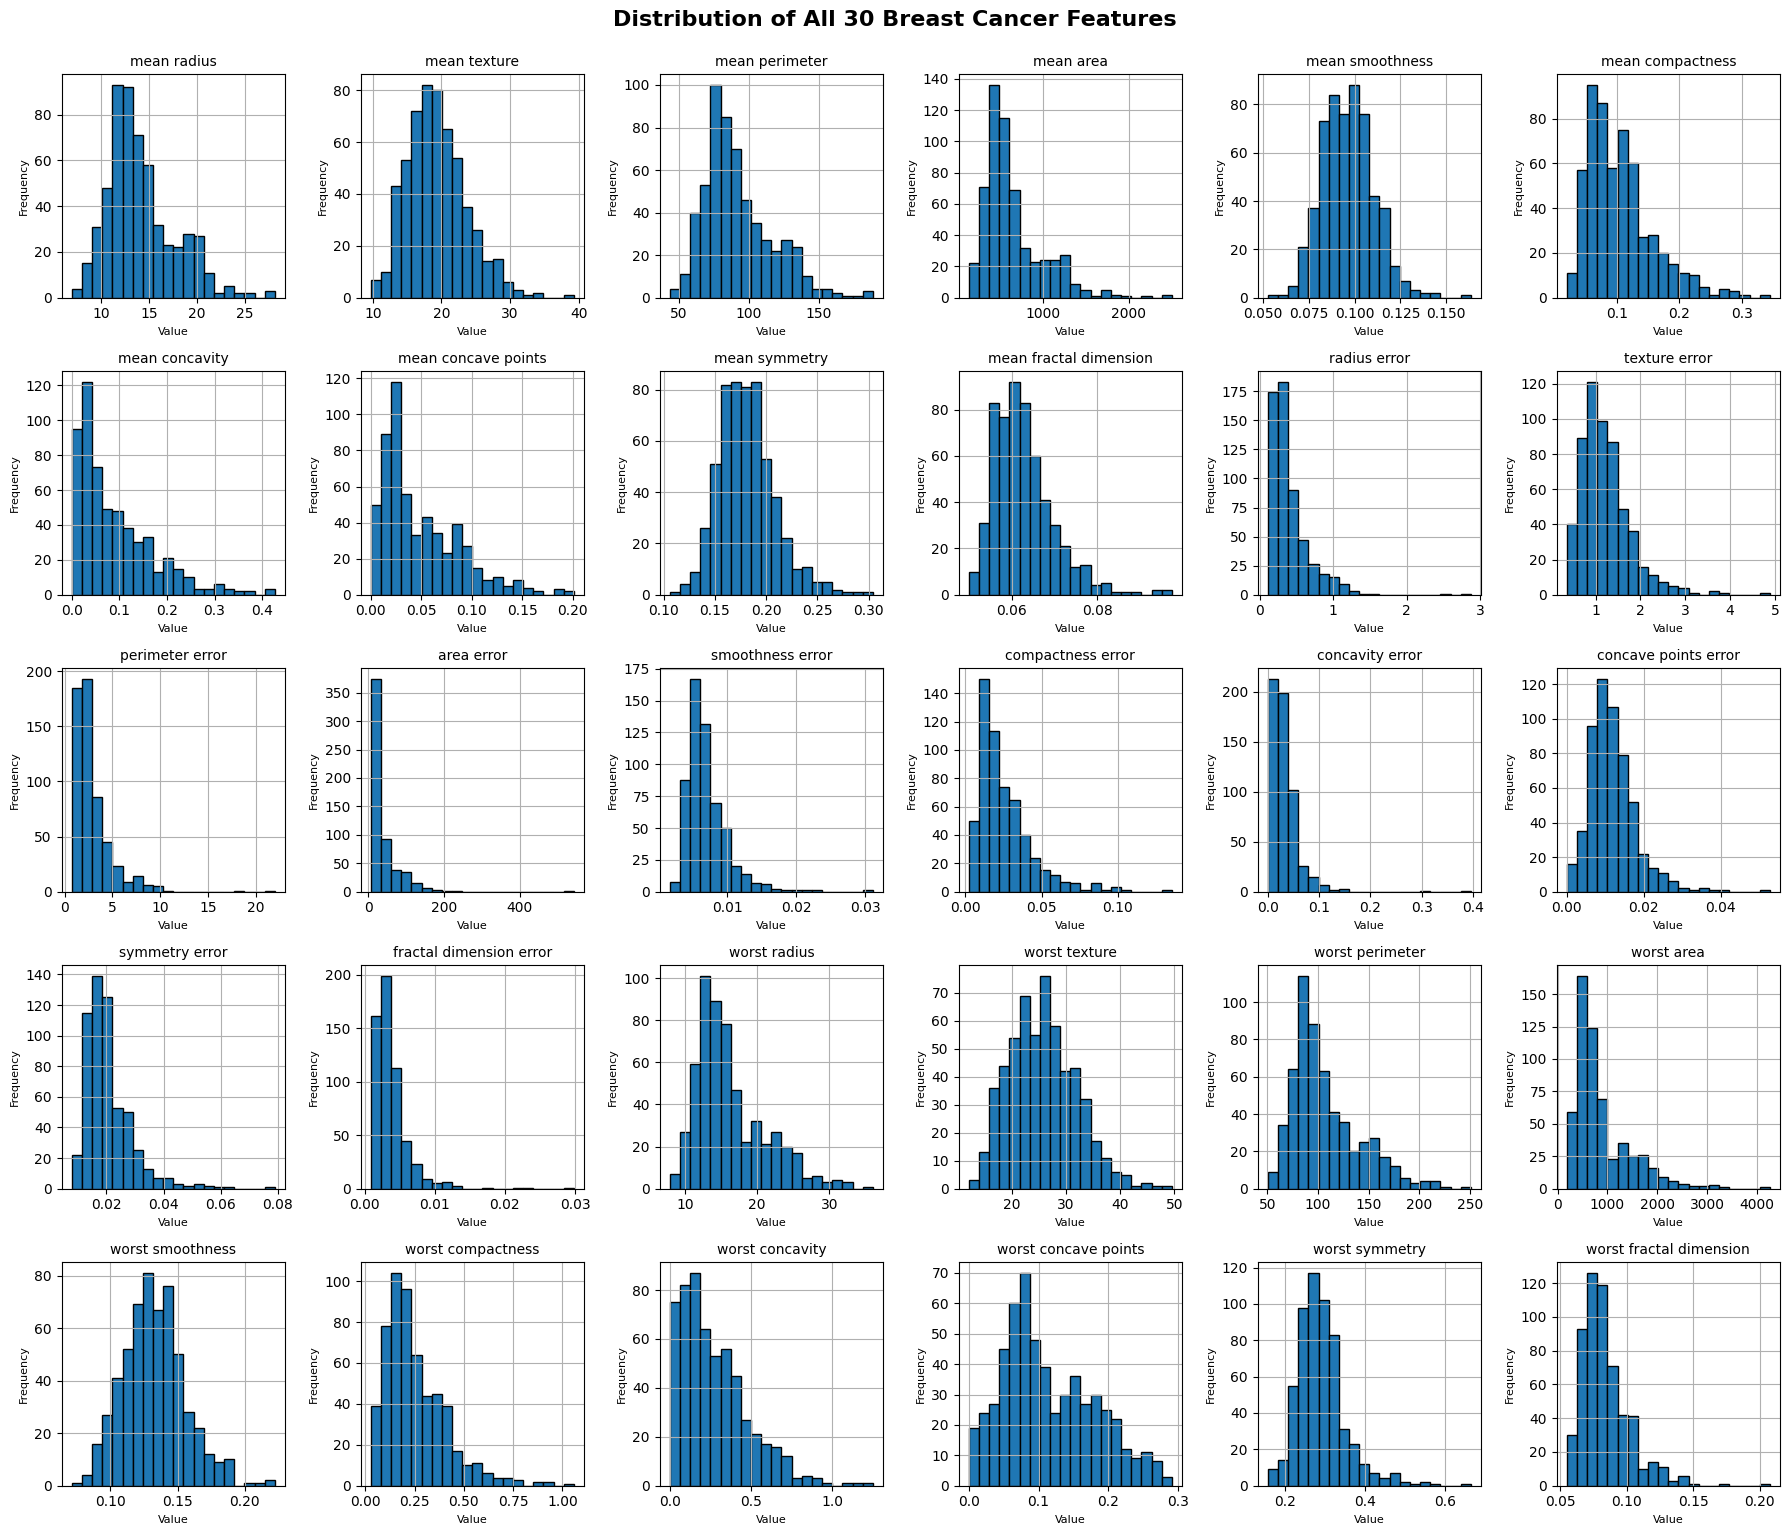

In [3]:
import matplotlib.pyplot as plt
import math

ncols = 6
nrows = math.ceil(len(dataset.feature_names)/ncols)

print("\nPlotting Histograms ...")
plt.figure(figsize=(18, nrows*3))
for i, feature in enumerate(dataset.feature_names):
    plt.subplot(nrows, ncols, i + 1)
    df[feature].hist(bins=20, edgecolor='black')
    plt.title(feature, fontsize=10)
    plt.xlabel('Value', fontsize=8)
    plt.ylabel('Frequency', fontsize=8)

plt.tight_layout()
plt.suptitle('Distribution of All 30 Breast Cancer Features', y=1.02, fontsize=16, fontweight='bold')
plt.show()

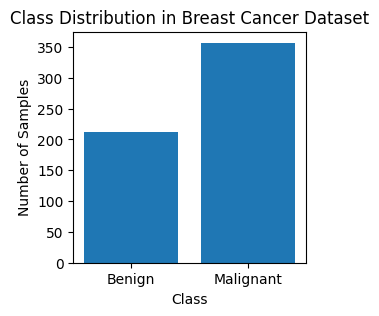

In [4]:
class_distribution = df['target'].value_counts()
plt.figure(figsize=(3, 3))
plt.bar(class_distribution.index, class_distribution.values)
plt.xticks(class_distribution.index, ['Malignant', 'Benign'])
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Breast Cancer Dataset')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, 
    Y, 
    test_size=0.2, 
    random_state=42, 
    stratify=Y
)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 455 samples
Testing set size: 114 samples


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("features standardized using StandardScaler.")

features standardized using StandardScaler.


In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, Y_train)
print("Logistic Regression model trained.")

Y_pred = model.predict(X_test_scaled)
print("Predictions on test set completed.")

Logistic Regression model trained.
Predictions on test set completed.


Accuracy: 0.9825
Confusion Matrix:
[[41  1]
 [ 1 71]]


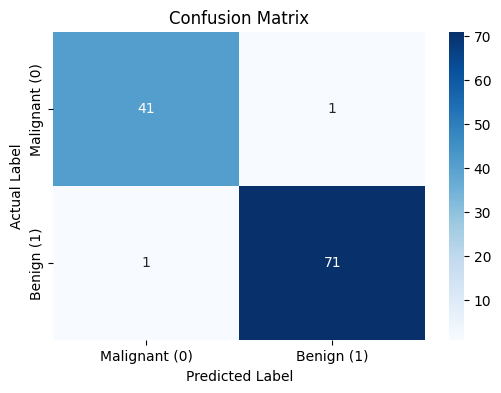

In [10]:
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.4f}")

cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Malignant (0)', 'Benign (1)'], 
            yticklabels=['Malignant (0)', 'Benign (1)'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

